# Mars vs Earth Seismology Comparison

In [1]:
# Import necessary files for running code throughout notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from obspy import read_inventory, read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime, Stream, read, Trace
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import tifffile
import imagecodecs

In [2]:
# Use this function to read a stream of seismic data from a file
def readSeismoData(stream, freq):
    f=freq
    stream.filter(type='highpass', freq=f)
    stream.select(component='Z')
    trace = stream[0]
    tr_s , tr_d = trace.stats , trace.data
    print(stream)
    print(tr_s)
    print(tr_d)

## Mars Data

The data is taken in the Elysium Planetia region of the planet. Elysium Planetia is a region defined by high volcanic activity as result of a mantle plume with some of the highest slopes on the planet!

### Elysium Planetia Geology

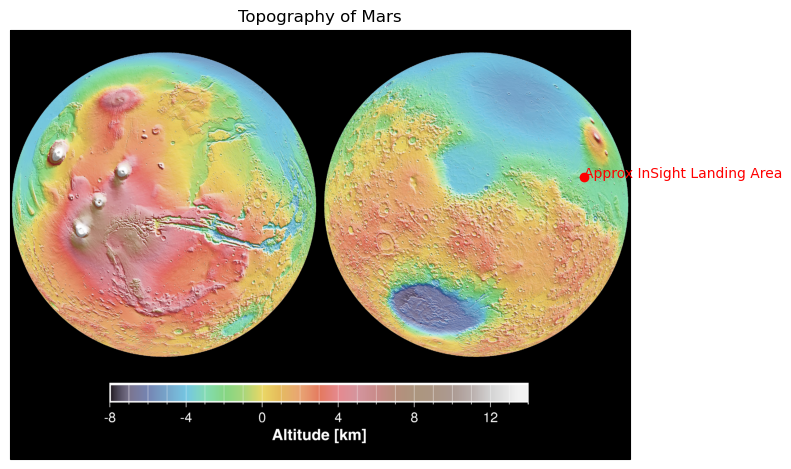

In [3]:
elevation = tifffile.imread('../DATA/PIA02820.tif')

projection = ccrs.Mercator()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=projection)

ax.imshow(elevation, cmap='terrain', origin='upper')

x, y = 3700,950
ax.scatter(x, y, marker='o', color='red')
ax.annotate("Approx InSight Landing Area", xy=(x, y), color='red')
ax.set_title('Topography of Mars')

plt.savefig('../Figures/MarsTopo.png',dpi=150,bbox_inches='tight')

### Elyse Station Seismic Data

In [4]:
print("Elyse Count Data:")
st1 = read('../DATA/Mars.mseed')
readSeismoData(st1, 0.01)

Elyse Count Data:
3 Trace(s) in Stream:
XB.ELYSE.02.BHZ | 2021-07-10T13:15:05.019000Z - 2021-07-10T15:15:04.969000Z | 20.0 Hz, 144000 samples
XB.ELYSE.02.BHN | 2021-07-10T13:15:05.019000Z - 2021-07-10T15:15:04.969000Z | 20.0 Hz, 144000 samples
XB.ELYSE.02.BHE | 2021-07-10T13:15:05.018000Z - 2021-07-10T15:15:04.968000Z | 20.0 Hz, 144000 samples
         network: XB
         station: ELYSE
        location: 02
         channel: BHZ
       starttime: 2021-07-10T13:15:05.019000Z
         endtime: 2021-07-10T15:15:04.969000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 144000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 2527, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 3881472})
      processing: ["ObsPy 1.2.2: filter(options={'freq': 0.01}::type='highpass')"]
[  0.00000000e+00  -2.76230646e-16  -1.18856262e-15 ...,  -1.92007308e-10
  -1.92073006e-10  -1.92135313e-10]


#### Filtering and Displaying Count Data

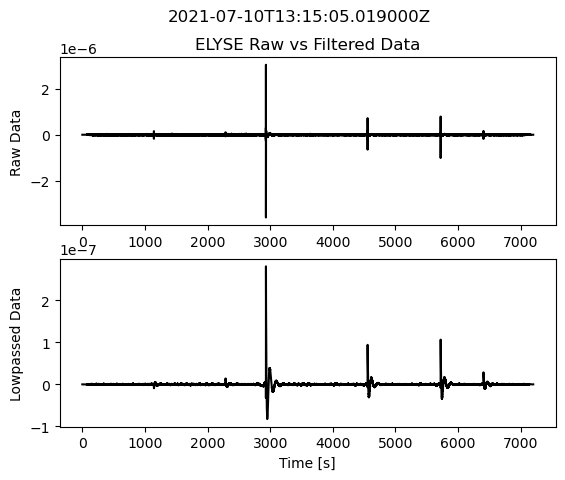

<Figure size 640x480 with 0 Axes>

In [5]:
# using trace from 'Mars.mseed' stream
tr1 = st1[0]

# Filtering with a lowpass on a copy of the original trace
tr1_filt = tr1.copy()
tr1_filt.filter('lowpass', freq=1, corners=2, zerophase=True)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr1.stats.npts / tr1.stats.sampling_rate, tr1.stats.delta)
plt.subplot(211)
plt.title('ELYSE Raw vs Filtered Data')
plt.plot(t, tr1.data, 'k')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr1_filt.data, 'k')
plt.ylabel('Lowpassed Data')
plt.xlabel('Time [s]')
plt.suptitle(tr1.stats.starttime)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.show()

plt.savefig('../Figures/MarsRawFiltered.png',dpi=150,bbox_inches='tight')
#Lowpass = lower than certain # signals passed - cleared up outliers

#### Displaying Day Plots

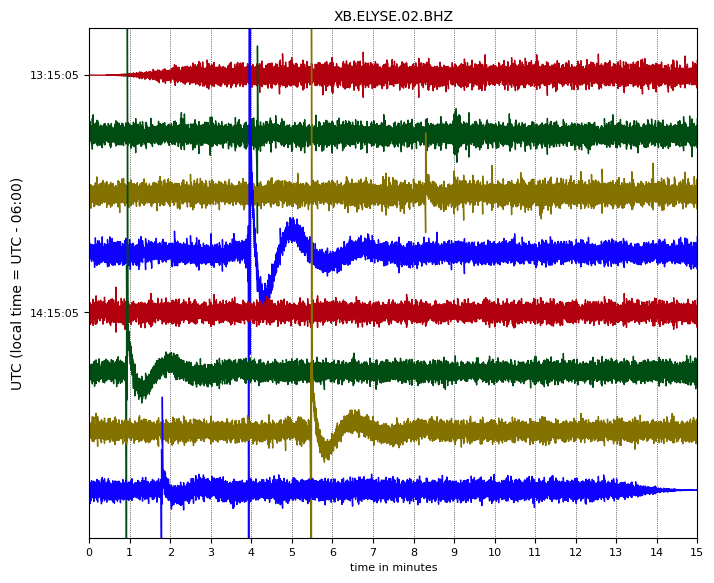

<Figure size 640x480 with 0 Axes>

In [6]:
tr1.plot(type='dayplot')
plt.savefig('../Figures/MarsDayplot.png',dpi=150,bbox_inches='tight')

## Earth Data

Because of the mantle plume aspect present in the area we've assessed on Mars, we decided to compare our Mars data to the Yellowstone region of the United States. The area is heavily monitered by the USGS and is centeralized by one large volcano just like Elysium Panetia (Elysium Mons).

### Yellowstone Geology

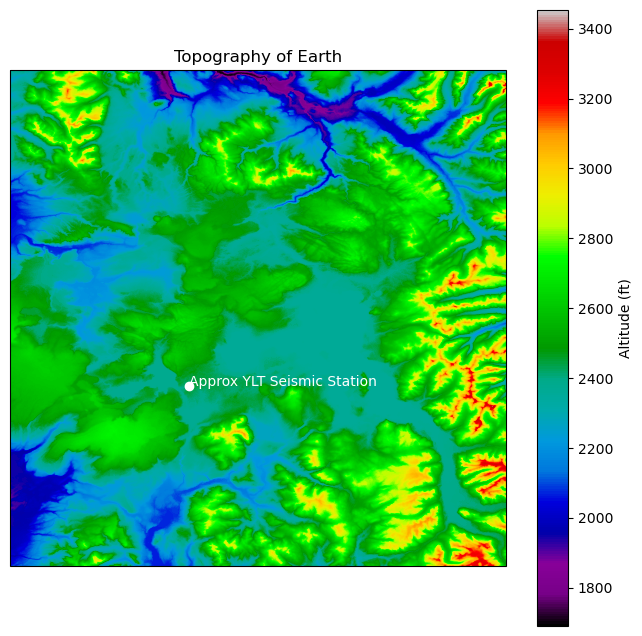

In [7]:
elevation = tifffile.imread('../DATA/WyomingT.tif')

projection = ccrs.Mercator()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=projection)

img = ax.imshow(elevation, cmap='nipy_spectral', origin='upper')
cbar = plt.colorbar(img, orientation="vertical", pad=0.05)
cbar.set_label('Altitude (ft)')

x, y = 1300,2300
ax.scatter(x, y, marker='o', color='white')
ax.annotate("Approx YLT Seismic Station", xy=(x, y), color='white')
ax.set_title('Topography of Earth')

plt.savefig('../Figures/YSTopo.png',dpi=150,bbox_inches='tight')

#### YLT Location

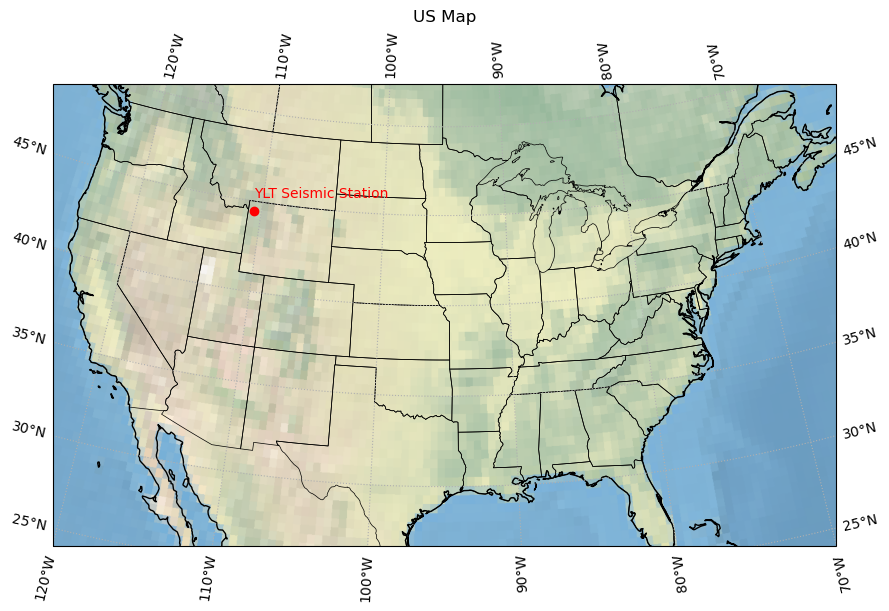

In [8]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.coastlines()
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')
ax.stock_img()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, ls='dotted')
ax.set_title('US Map')
long,lat = -110.588,44.437
ax.scatter(long,lat, marker='o', color='red',transform=ccrs.PlateCarree())
plt.annotate('YLT Seismic Station',xy=(long,lat), textcoords="offset points", xytext=(0,10), ha='left',transform=ccrs.PlateCarree(),color='red')

plt.savefig('../Figures/USMap.png',dpi=150,bbox_inches='tight')

### Yellowstone Seismic Data

In [9]:
print("YLT Count Data:")
st4 = read('../DATA/Yellowstone.mseed',starttime = UTCDateTime('2023-4-18 9:00:00'),endtime=UTCDateTime('2023-4-18 11:00:00'))
readSeismoData(st4, 0.1)

YLT Count Data:
1 Trace(s) in Stream:
WY.YLT.01.EHZ | 2023-04-18T09:00:00.000000Z - 2023-04-18T11:00:00.000000Z | 100.0 Hz, 720001 samples
         network: WY
         station: YLT
        location: 01
         channel: EHZ
       starttime: 2023-04-18T09:00:00.000000Z
         endtime: 2023-04-18T11:00:00.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 720001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 1104, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 12131328})
      processing: ['ObsPy 1.2.2: trim(endtime=None::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2023, 4, 18, 9, 0))', 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2023, 4, 18, 11, 0)::fill_value=None::nearest_sample=True::pad=False::starttime=None)', "ObsPy 1.2.2: filter(options={'freq': 0.1}::type='highpass')"]
[-46.61573796 -44.85854201 -40.1484474  ...,   4.3406932    6.249718

#### Filtering and Displaying Count Data

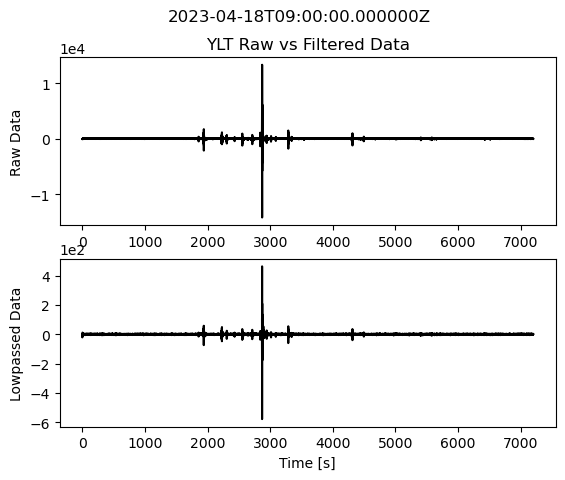

<Figure size 640x480 with 0 Axes>

In [10]:
# using trace from 'Mars.mseed' stream
tr2 = st4[0]

# Filtering with a lowpass on a copy of the original trace
tr2_filt = tr2.copy()
tr2_filt.filter('lowpass', freq=1, corners=2, zerophase=True)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr2.stats.npts / tr2.stats.sampling_rate, tr2.stats.delta)
plt.subplot(211)
plt.title('YLT Raw vs Filtered Data')
plt.plot(t, tr2.data, 'k')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr2_filt.data, 'k')
plt.ylabel('Lowpassed Data')
plt.xlabel('Time [s]')
plt.suptitle(tr2.stats.starttime)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.show()

plt.savefig('../Figures/YSRawFiltered.png',dpi=150,bbox_inches='tight')

#Lowpass = lower than certain # signals passed - cleared up outliers

#### Displaying Day Plots

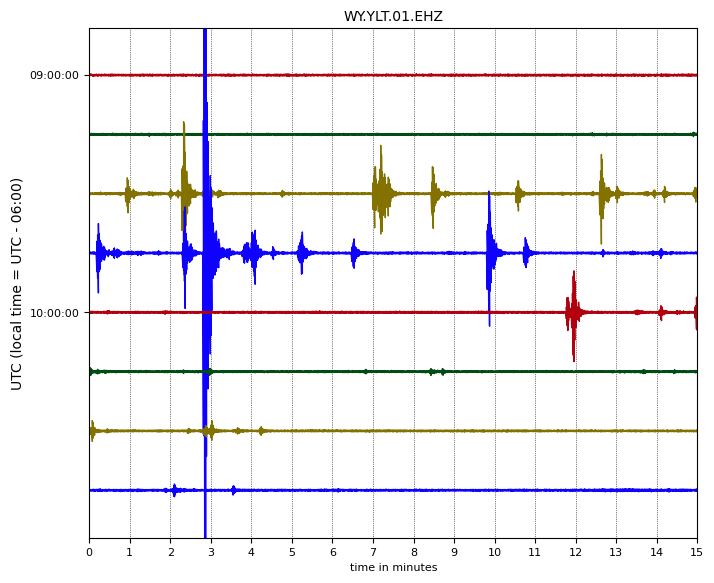

<Figure size 640x480 with 0 Axes>

In [11]:
tr2.plot(type='dayplot')

plt.savefig('../Figures/YSDayplot.png',dpi=150,bbox_inches='tight')